# Homework 14

__For HW14, you will be expected to answer questions about your work in this notebook via Canvas (Modules->Module 14->HW14 Notebook and submission form). You may wish to reference this quiz while working through the assignment.__
## Submission instructions¶
Before completing this homework,
1. please review this homework's submission form on Canvas available under the "Modules" menu option and briefly review this notebook end to end.
2. To get you started we provide a template solution with missing code and prompts. Please complete the missing code, run the experiments and log your results.
3. When you're sufficiently happy with your results, please begin the submission process on Canvas. Use the submission form for this homework available under "Modules" menu option. Please note that the submission form is available at the same place where you downloaded the homework from.
4. You may wish to reference the submission form (Modules->Module 13->HW13 Notebook and submission form) while working through the tasks.

Please complete all core assignment tasks (marked "TASK"). For bonus points, please complete the optional stretech assignment tasks (marked "OPTIONAL").

The goals of this HW include the following:
* Understanding the operation of a multiclass perceptron classifier.
* Building a multiclass perceptron classifier.
    * Applying regularization
    * Evaluating performance metrics unique to a multiclass problem.
* Tuning a multiclass perceptron for text classification.
  
You will submit the results of your work in this notebook using the **HW14 Submission Form** assignment on Canvas.

## Prepare the notebook

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import re
import nltk
from pprint import pprint
from time import time

from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.datasets import make_classification
from nltk.corpus import stopwords
from nltk.corpus import reuters
nltk.download('stopwords')
nltk.download('reuters')

from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Support Vector Machines 
In this section of the notebook, we are doing a background review of your understanding of SVM. The first part is plotting different SVM kernels and see how that changes the classification. 
The second part aims to show the effects of margins on SVM classification 

## Plot different Kernels

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
import matplotlib.patches as mpatches
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)
colors = ['green','blue']
groups=["Class 1 points", "Class 2 points"]
np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# fit the model
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    # create an svm model for each of the kernels with gamma=10
    # fit the train data and calculate accuracy for train & test data
    #==================================================#
    #               Your code starts here              #
    #==================================================#
    clf = svm.SVC()
    clf.fit()
    train_acc= 
    test_acc= 
    #==================================================#
    #               Your code ends here                #
    #               Please don't add code below here   #
    #==================================================#
    print (kernel , " kernel => train accuracy:", np.round(train_acc,3), "test accuracy: ", np.round(test_acc,3))
    print( "number of support vectors",np.sum(clf.n_support_))
    plt.figure(figsize=(10,6))
    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, s=20,cmap=matplotlib.colors.ListedColormap(colors))
    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    #plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1], c='r', s=30, label= "support vectors")
    red_patch = mpatches.Patch(color='red', label='Support Vectors')
    blue_patch = mpatches.Patch(color='blue', label='Class 1 points')
    green_patch = mpatches.Patch(color='green', label='Class 2 points')
    plt.legend(handles=[red_patch, blue_patch,green_patch])
    plt.title(kernel)
plt.show()

## Soft margin vs. harder margins

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 2, :2]
y = y[y != 2]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)    # Soft SVM
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)  #Harder SVM
# build the two pipelines for the for the soft svm and the harder svm
# the first step is sclaing the data for both pipelines
#==================================================#
#               Your code starts here              #
#==================================================#
scaled_svm_clf1 = Pipeline([
        ("scaler", ),
        ("linear_svc1", ),
])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
       ("linear_svc2", ),
]) 
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#
scaled_svm_clf1.fit(X_train, y_train)
scaled_svm_clf2.fit(X_train, y_train)

In [ ]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

In [ ]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    # Complete the code below to calculate the margin
    # and gutter_up and gutter_down for the decision boundary
    #==================================================#
    #               Your code starts here              #
    #==================================================#
    margin = 
    gutter_up = 
    gutter_down = 
    #==================================================#
    #               Your code ends here                #
    #               Please don't add code below here   #
    #==================================================#
    
    
    # NOTE: we have two support vectors
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [ ]:
train_acc1= scaled_svm_clf1.score(X_train,y_train)
test_acc1= scaled_svm_clf1.score (X_test,y_test)
train_acc2= scaled_svm_clf2.score(X_train,y_train)
test_acc2= scaled_svm_clf2.score (X_test,y_test)
print (" soft margins C=1 => train accuracy:", train_acc1, "test accuracy: ", test_acc1)
print (" harder margins C=100 => train accuracy:", train_acc2, "test accuracy: ", test_acc2)


plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bo", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 2, 8)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4,7, 1, 5])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bo")
plot_svc_decision_boundary(svm_clf2, 2, 8)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 7, 1.5, 5])

# TASK: Multiclass Preceptron : variable importance

Compare the hyperplane coefficients barchart  with the pairwise visualization and complete the analysis provided below.

## Load the data and build a perceptron classifier model

In [ ]:
irisDataset = load_iris() 

X = irisDataset.data
y = irisDataset.target

#create a heldout dataset for final testing only
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
df = pd.DataFrame(X, columns=irisDataset.feature_names)
df['IrisClass'] = y

perceptron_pipeline = Pipeline([
        #('imputer', Imputer(strategy="median")), #Use the "median" to impute missing vlaues
        ('std_scaler', StandardScaler()),
        ('perceptron', Perceptron(random_state=42))
    ])
# Fit the train data to the pipeline
# Predict for X-test
#==================================================#
#               Your code starts here              #
#==================================================#
perceptron_pipeline.fit()
preds = 
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#

### Generate visualizations (pairwise scatterplot and bar chart of the model coefficients)

In [ ]:
sns.pairplot(sns.load_dataset("iris"), hue="species", height=4);

model = perceptron_pipeline.named_steps['perceptron']
print(np.round(model.coef_,3))
plt.figure(figsize=(12, 8))
plt.bar(np.arange(model.coef_.shape[1]) - 0.2, model.coef_[0], color="red", width=0.2, label="setosa")
plt.bar(np.arange(model.coef_.shape[1]) - 0.0, model.coef_[1], color="green", width=0.2, label="versicolour")
plt.bar(np.arange(model.coef_.shape[1]) + 0.2, model.coef_[2], color="blue", width=0.2, label="virginica")
plt.xticks(np.arange(model.coef_.shape[1]), df.columns[:4], rotation=0)
plt.xlim([-1, model.coef_.shape[1]])
plt.title("Multiclass Perceptron Model coefficients")
plt.legend(loc="lower right");
plt.grid()


### Fill in the blanks to complete the analysis

Use the results of the hyperplane cooefficient's barchart with the pairwise feature distributions to understand how the different features can be used to classify the different iris classes

**Fill in the appropriate text:**

Compare the hyperplane cooefficients barplot above with the pairwise feature distributions plotted previously.

Looking at the barplot, one can see that ___ has the least influence on defining a separating hyperplane for the versicolour class.  Looking at the the pairwise plot, this feature does not distinguish versicolour in combination with any other feature.

Looking at the second column on the pairwise plot, setosa and versicolor classes are both impossible to distinguish based on ___ ; we can observe that 99% of the vertical lines that can be drawn, contain more than one class and hence wont be able to separate classes based on this feature.

Both petal width and petal length are excellent features to consider since either one can separate 100% of ___ .  In combination, they are able to separate close to 100% of the remaining classes too. ___  is the most influential factor in determining ____ class. This is also clearly visible in the pairwise plot, as 99% of the vertical lines clearly indicate exactly one class.

# TASK: Multiclass  perceptron with regularization


Using the SKLearn class `SGDClassifier` within the pipeline provided below, learn multiclass perceptron using gridsearch to evaluate:
* L1, L2 and elasticnet regularization
* alpha values $\in [10, 1, 0.1, 0.01, 0.001)$

Report your the accuracy score on your test data and the hyperparameters for your best model.

In [ ]:
# The number of informative features. Each class is composed of a number
# of gaussian clusters each located around the vertices of a hypercube
# in a subspace of dimension ``n_informative``. For each cluster,
# informative features are drawn independently from  N(0, 1) and then
# randomly linearly combined within each cluster in order to add
# covariance. The clusters are then placed on the vertices of the
# hypercube.

# generate classification dataset
x, y = make_classification(1000, n_classes=3, n_informative=6, random_state=42)

# generate splits for crossfold validation
cv = KFold(3, random_state=42, shuffle=True)
cv_idx = cv.split(x)


# Create a pipeline, where the first step is scaling the features using StandardScaler()
# and the second step is SGDClassifier() with loss='perceptron' and random_state=42
#==================================================#
#               Your code starts here              #
#==================================================#
pipeline = Pipeline([
      ('std_scaler', ),
      ('perceptron', )
])
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#


parameters = { 
    'perceptron__alpha': (10, 1, 0.1, 0.01, 0.001),
    'perceptron__penalty': ('l1', 'l2', 'elasticnet'),
}


grid_search = GridSearchCV(pipeline, parameters, cv=cv_idx, n_jobs=-1, verbose=1, )
grid_search.fit(x,y)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
    
preds = grid_search.predict(x)
accuracy = accuracy_score(preds, y)

results = pd.DataFrame(columns=["Model", "Test Accuracy"])
results.loc[len(results)] = ["Perceptron", np.round(accuracy, 3)]
results

# Calculate F1 score with micro and macro averaging




### Equation  $F_1$ score

$
F_1 = \cfrac{2}{\cfrac{1}{\text{precision}} + \cfrac{1}{\text{recall}}} = 2 \times \cfrac{\text{precision}\, \times \, \text{recall}}{\text{precision}\, + \, \text{recall}} = \cfrac{TP}{TP + \cfrac{FN + FP}{2}}
$





So for our Reuters multiclass classification problem the labels are not binary, but are one-hot encoded. Fortunately, there are  options that work with this type of labeled  data for Precision:

* precision_score(y_test, y_pred, average=None) will return the precision scores for each class, while
* precision_score(y_test, y_pred, average='micro') will return the total ratio of tp/(tp + fp)
* precision_score(y_test, y_pred, average='macro') will return macro average (class average = sum(precision)/numOfClasses). This is option is much preferred which dealing with imbalanced data.

The same is true for other performance measures such as F1.

### Run this code to generate targets and predictions

In [ ]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.utils import shuffle
import numpy as np


_, y1 = make_classification(n_samples=20, n_features=100, n_informative=30, n_classes=5, random_state=12)
y2 = shuffle(y1, random_state=1)
y3 = shuffle(y1, random_state=2)
y4 = shuffle(y1, random_state=3)


y_text = np.vstack((y1, y2, y3, y4)).T

# One hot encode the target class variables
mlb = MultiLabelBinarizer(classes=(0, 1, 2, 3, 4))
y = mlb.fit_transform(y_text)

# Use make_classification to create a cluster of 20 sample points
# with a 100 features, 30 informative features, 5 classes
# and random state =42
#==================================================#
#               Your code starts here              #
#==================================================#
_, y1 = make_classification()
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#


y2 = shuffle(y1, random_state=1)
y3 = shuffle(y1, random_state=2)
y4 = shuffle(y1, random_state=3)
y5 = shuffle(y1, random_state=4)

#NOTE: Y target vector for 3 classes
# note that each example can have one or MORE class labels
y_preds_text = np.vstack((y1, y2, y3, y4, y5)).T     
# One hot encode the target class variables
mlb = MultiLabelBinarizer(classes=(0, 1, 2, 3, 4))
y_preds = mlb.fit_transform(y_preds_text)

### These are the 20 multilabel targets:

In [ ]:
y

### These are the 20 predictions generated by our "model":

In [ ]:
print(y_preds)

## TASK: Using the one-hot encorded targets and predictions data above (for 20 multi-label samples) calculate the F1 score using a micro and macro approach.

In [ ]:
# Complete the following code to calculate the
# F1 score with the micro and macro approach
#==================================================#
#               Your code starts here              #
#==================================================#
print("F1 Micro:",round(f1_score(....),3))
print("F1 Macro:",round(f1_score(....),3))
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#

# [Optional Task] Reuters classification with different numbers of classes k

Using the code provided below, generate a series of experiments based on the Reuters dataset:

At a minimum:
* Compare the perceptron algorithm to logistic regression ("log" loss). 
* Experiment with unigrams and bigrams.
* Experiment with at least two more hyperparameters.

Keep a log of your results for each experiment in a table of results (pandas dataframe).  Your table of results should be a meaningful record or your work on this task, not a dump of grid search output for one experiment.  Please include:
* Description of the model (e.g., Baseline Logistic Regression k=30, Perceptron k=50, etc.).
* Identify key hyperparameters.
* Precision, recall and F1 scores calculated using micro and macro approach.
* Time to complete the experiment.
* Hardware used.

Think about how (and why) these changes affect your results.


## Load all the data

In [ ]:
documents = reuters.fileids()
test = [d for d in documents if d.startswith('test/')]
train = [d for d in documents if d.startswith('training/')]

cachedStopWords = nltk.download("stopwords") #stopwords.words("english")
cachedStopWords = nltk.corpus.stopwords.words('english')
np.random.seed(42)
def loadReutersTrainTest():
    documents = reuters.fileids()
    train_docs_id = list(filter(lambda doc: doc.startswith("train"), documents))
    test_docs_id = list(filter(lambda doc: doc.startswith("test"), documents))
    #Input text
    train_docs = [reuters.raw(doc_id) for doc_id in train_docs_id]
    test_docs = [reuters.raw(doc_id) for doc_id in test_docs_id]
    #Categories 
    # Complete the following code to get the categories
    # of the train and the test set
    #==================================================#
    #               Your code starts here              #
    #==================================================#
    train_target_names = [reuters.categories(...) for ... in ...]
    test_target_names = [reuters.categories(...) for ... in ...]
    #==================================================#
    #               Your code ends here                #
    #               Please don't add code below here   #
    #==================================================#
    return(train_docs, test_docs, train_target_names, test_target_names)

train_docs, test_docs, train_target_names, test_target_names = loadReutersTrainTest()

print("Number of train docs is ", len(train_docs))
print("Number of test docs is ", len(test_docs))


## The categories (classes) of the dataset

In [ ]:
# create counter to summarize
categories = []
file_count = []
np.random.seed(42)
# count each tag's number of documents
for i in reuters.categories(reuters.fileids()):
    """print("$ There are {} documents included in topic \"{}\""
          .format(len(reuters.fileids(i)), i))"""
    file_count.append(len(reuters.fileids(i)))
    categories.append(i)

# create a dataframe out of the counts
allCategories  = pd.DataFrame(
    {'categories': categories, "file_count": file_count}) \
    .sort_values('file_count', ascending=False)
allCategories

## Load data using a number of classes k=20

In [ ]:
# determines number of categories.
k=20
# Select documents that only contains top two labels with most documents
category_filter =allCategories.iloc[0:k, 0].values.tolist()
print(category_filter)

In [ ]:
#load examples for top K classes
def loadReutersTrainTestTopFiltered(category_filter):
    # select fileid with the category filter
    np.random.seed(42)
    documents = reuters.fileids()

    doc_list = np.array(reuters.fileids(category_filter))
    doc_list = doc_list[doc_list != 'training/3267']

    train_docs_id = list(filter(lambda doc: doc.startswith("train"), doc_list))
    test_docs_id = list(filter(lambda doc: doc.startswith("test"), doc_list))
    #Input text
    train_docs = [reuters.raw(doc_id) for doc_id in train_docs_id]
    test_docs = [reuters.raw(doc_id) for doc_id in test_docs_id]
    #Categories 
    train_target_names = [reuters.categories  (doc_id) for doc_id in train_docs_id]
    test_target_names = [reuters.categories  (doc_id) for doc_id in test_docs_id]
    #remove labels from each example that have not been selected
    # ['earn', 'acq', 'money-fx', 'grain', 'crude', 'trade', 'interest', 'ship', 'wheat', 'corn']
    # E.g., ['Japanese Anime',  'earn', 'acq']  --> ['earn', 'acq'] 
    transformedTags = []
    for tags in train_target_names:
        tagsTmp=[]
        for tag in tags:
            if tag in category_filter:
                tagsTmp.append(tag)
        transformedTags.append(tagsTmp)
    train_target_namesK = transformedTags  
    
    transformedTags = []
    for tags in test_target_names:
        tagsTmp=[]
        for tag in tags:
            if tag in category_filter:
                tagsTmp.append(tag)
        transformedTags.append(tagsTmp)
    test_target_namesK = transformedTags    
   
    return(train_docs, test_docs, train_target_namesK, test_target_namesK)

train_docs, test_docs, train_target_names, test_target_names = loadReutersTrainTestTopFiltered(category_filter)
print("Number of train docs is ", len(train_docs))
print("Number of test docs is ", len(test_docs))
mlb = MultiLabelBinarizer(classes=category_filter)
Y_train = mlb.fit_transform(train_target_names)
Y_test = mlb.fit_transform(test_target_names)



## Defining the pipeline

In [ ]:
# Define a pipeline combining the text feature extractor CountVectorizer
# using cachedStopWords as stop_words, TfidfTransformer() and 
# MultiOutputClassifier() with SGDClassifier() as a parameter, and max_iter=50 as parameter within SGDClassifier() 
#==================================================#
#               Your code starts here              #
#==================================================#
pipeline = Pipeline([
    ('vect', ),
    ('tfidf', ), 
    ('clf', )),])

#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#
pipeline.named_steps

## Defining evaluation function

In [ ]:
#Multi-labels per example evaluation
def evaluate(test_labels, predictions):
    precision = precision_score(test_labels, predictions, average='micro')
    recall = recall_score(test_labels, predictions, average='micro')
    f1 = f1_score(test_labels, predictions, average='micro')
    print("Micro-average quality numbers")
    print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

    # Complete the following code to calculate the
    # precision, recall and F1 score using the macro approach
    #==================================================#
    #               Your code starts here              #
    #==================================================#
    precision = precision_score()
    recall = recall_score()
    f1 = f1_score()
    #==================================================#
    #               Your code ends here                #
    #               Please don't add code below here   #
    #==================================================#
    print("Macro-average quality numbers")
    print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
    

## Performing gridsearch 

In [ ]:
# Note: This cell might take more than an hour to run.
# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
# Parameters of the estimators in the pipeline can be accessed using the <estimator>__<parameter> syntax:
parameters = { #listed in the form of "step__parameter", e.g, clf__penalty
    #'vect__max_df': (0.5, 0.75, 1.0),
    #'vect__max_features': (None, 200,500), 
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams (single words) or bigrams (or sequence of words of length 2)
    #'tfidf__use_idf': (True, False),
    #'tfidf__norm': ('l1', 'l2'),
    'clf__estimator__alpha': (0.001, 0.01, .1),        ## access parameters for the estimator inside
    'clf__estimator__penalty': ('l1', 'l2', 'elasticnet'),  ## the MultioutputClassifier step by using
    'clf__estimator__loss': ('perceptron', 'log')     ## step__MultioutputClassierParameter__EstimatorParameter
}

if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    # n_jobs=-1 means that the computation will be dispatched on all the CPUs of the computer.
    #
    # By default, the GridSearchCV uses a 3-fold cross-validation. However, if it 
    #            detects that a classifier is passed, rather than a regressor, it uses a stratified 3-fold.
    cv = KFold(n_splits=3, random_state=42, shuffle=True)
    grid_search = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-2, verbose=1, scoring="f1_micro", return_train_score=True)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(train_docs, Y_train)
    print("done in %0.3fs" % (time() - t0))
    print()
    #print("grid_search.cv_results_", grid_search.cv_results_)
    #estimator : estimator object. This is assumed to implement the scikit-learn estimator interface.  
    #            Either estimator needs to provide a score function, or scoring must be passed.
    #Accuracy is the default for classification; feel free to change this to precision, recall, fbeta
    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
        
    #Test on Heldlout test set
    preds = grid_search.best_estimator_.predict(test_docs)
    print("--------------------------------------------------------------------")
    evaluate(Y_test, preds)
    

### mean_train_score	and mean_test_score
the gridsearch attribute of `cv_results_`  `mean_test_score` is calculated as the average of the test scores of each cross validation fold. Since in this case we are using `"f1_micro"`as as scoring metric. Each `mean_test_score` is the mean of the 3 (`n_splits=3`) `f1_micro scores`. 

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

results = pd.DataFrame(grid_search.cv_results_).loc[:, ['mean_test_score','params','mean_fit_time','mean_score_time']].sort_values(by='mean_test_score', ascending=False)
results.head(20)


## Reuters Classification with SVM
### Defining the pipeline for SVM

In [ ]:
from sklearn import svm
# Define a pipeline combining the text feature extractor CountVectorizer
# using cachedStopWords as stop_words, TfidfTransformer() and 
# MultiOutputClassifier() with SVC() as a parameter, and max_iter=50 as paramter within SVC()
#==================================================#
#               Your code starts here              #
#==================================================#
pipeline = Pipeline([
    ('vect', ),
    ('tfidf', ), 
    ('svm', )),])

#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#
pipeline.named_steps

### Performing gridsearch for SVM

In [ ]:

# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
# Parameters of the estimators in the pipeline can be accessed using the <estimator>__<parameter> syntax:
parameters = { #listed in the form of "step__parameter", e.g, clf__penalty
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams (single words) or bigrams (or sequence of words of length 2)
    #'tfidf__use_idf': (True, False),
    #'tfidf__norm': ('l1', 'l2'),
    'svm__estimator__C': (.1, 1, 10),        ## access parameters for the estimator inside
    'svm__estimator__kernel': ('linear', 'poly'),  ## the MultioutputClassifier step by using
    'svm__estimator__degree': (1,2,3)     ## step__MultioutputClassierParameter__EstimatorParameter
}

if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    # n_jobs=-1 means that the computation will be dispatched on all the CPUs of the computer.
    #
    # By default, the GridSearchCV uses a 3-fold cross-validation. However, if it 
    #            detects that a classifier is passed, rather than a regressor, it uses a stratified 3-fold.
    cv = KFold(n_splits=3, random_state=42, shuffle=True)
    grid_search = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-2, verbose=1, scoring="f1_micro", return_train_score=True)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(train_docs, Y_train)
    print("done in %0.3fs" % (time() - t0))
    print()
    #print("grid_search.cv_results_", grid_search.cv_results_)
    #estimator : estimator object. This is assumed to implement the scikit-learn estimator interface.  
    #            Either estimator needs to provide a score function, or scoring must be passed.
    #Accuracy is the default for classification; feel free to change this to precision, recall, fbeta
    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    # Complete the code below to get the parameters of your best model based on gridsearch
    #==================================================#
    #               Your code starts here              #
    #==================================================#
    best_parameters = 
    #==================================================#
    #               Your code ends here                #
    #               Please don't add code below here   #
    #==================================================#
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
        
    #Test on Heldlout test set
    preds = grid_search.best_estimator_.predict(test_docs)
    print("--------------------------------------------------------------------")
    evaluate(Y_test, preds)
    

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

results = pd.DataFrame(grid_search.cv_results_).loc[:, ['mean_train_score','mean_test_score','params','mean_fit_time','mean_score_time']].sort_values(by='mean_test_score', ascending=False)
results.head(20)


# [Optional Task] Multiclass perceptron: classification+training

Like most other techniques for training linear classifiers, the perceptron generalizes naturally to multiclass classification. Here, the input ${\displaystyle x}$  and the output ${\displaystyle y}$  are drawn from arbitrary sets. A feature representation function ${\displaystyle f(x,y)}$  maps each possible input/output pair to a finite-dimensional real-valued feature vector. As before, the feature vector is multiplied by a weight vector ${\displaystyle w}$, but now the resulting score is used to choose among many possible outputs:

$${\displaystyle {\hat {y}}=\operatorname {argmax} _{y}f(x,y)\cdot w.} $$



Learning again iterates over the examples, predicting an output for each, leaving the weights unchanged when the predicted output matches the target, and changing them when it does not. 

Given that the predicted class ${\hat{y}}$ is different to that actual class $y$:


$${\displaystyle {\hat {y}}=\operatorname {argmax} _{y}f(x,y)\cdot w.} $$

the update becomes for each $w_{i,j}$:



$
\begin{split}
\operatorname{update}(\hat{y},y) =
\begin{cases}
y_j = y& {w_{i,j}}^{(\text{next step})} = w_{i,j} + \eta  x_i\\
{y}_k = \hat{y}  & {w_{i,k}}^{(\text{next step})} = w_{i,k} - \eta  x_i
\end{cases} & \quad\quad
\end{split}
$

The above gradient update step for the multiclass perceptron is as follows:
* for every wrong prediction, penalize(reduce) the weights (and perpendicular distance) that got predicted wrongly and 
* increase the weights of the class that was the target, that we failed to predict correctly.


This multiclass feedback formulation reduces to the original perceptron when ${\displaystyle x}$  is a real-valued vector, ${\displaystyle y}$ is chosen from ${\displaystyle \{0,1\}} $, and ${\displaystyle f(x,y)=yx} $.

** Perceptron learning rule (weight update) for binary classifier**

$
{w_{i,j}}^{(\text{next step})} = w_{i,j} + \eta (y_j - \hat{y}_j) x_i
$



## [Optional Task] Complete the following code to build a Multiclass Perceptron algorithm

In [ ]:
class HomeGrownPerceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [ ]:
import numpy as np


class MulticlassHomeGrownPerceptron(HomeGrownPerceptron):
    """ Multiclass HomeGrown Perceptron classifier."""

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        n_classes = np.unique(y).size
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=(n_classes, 1 + X.shape[1]))
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                predicted = self.predict(xi)
                if target != predicted:  #Mistake
                    # Complete the following code to 
                    # Reduce the score of the incorrectly predicted class
                    #==================================================#
                    #               Your code starts here              #
                    #==================================================#
                    self.w_[predicted,1:] = 
                    self.w_[predicted,0] = 
                    #==================================================#
                    #               Your code ends here                #
                    #               Please don't add code below here   #
                    #==================================================#
                    #increase the score of the true class
                    self.w_[target,1:] += self.eta * xi
                    self.w_[target,0] += self.eta
                    errors += 1
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[:,1:].T) + self.w_[:,0].T
    
    def predict(self, X):
        """Return class label after unit step"""
        if X.ndim == 1:
            return np.argmax(self.net_input(X))
        else:
            return np.argmax(self.net_input(X), axis=1)


In [ ]:
wine = load_wine()
data = wine.data
targets = wine.target
target_names = wine.target_names

Split data. Confirm split and check class distribution. 

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data, targets, test_size=.2, shuffle=True, random_state=42)

print('Train: {}   {}'.format(Xtrain.shape, ytrain.shape))
print('Test: {}   {}'.format(Xtest.shape, ytest.shape))

In [ ]:
vals = np.unique(ytrain)
print('Train data')
for v in vals:
    print('{}: {}'.format(target_names[v], np.sum(ytrain == v)))
    
print('\nTest data')
for v in vals:
    print('{}: {}'.format(target_names[v], np.sum(ytest == v)))

## Fit data
Fit homegrown model and generate predictions.

In [ ]:
mcp = MulticlassHomeGrownPerceptron()
# fit the multiclass homegrown perceptron to the training data
# Predict classes for training data and test data
#==================================================#
#               Your code starts here              #
#==================================================#
mcp.fit()
ytrain_preds = 
ytest_preds = 
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#


## Results
Calculate metrics using micro and macro average.

In [ ]:
y = {'Train': [ytrain, ytrain_preds], 'Test': [ytest, ytest_preds]}
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision Micro ', 'Precision Macro'])
for k in y.keys():
    results.loc[len(results)] = ['Homegrown Multiclass Perceptron ({})'.format(k),
               round(accuracy_score(y[k][0], y[k][1]),5), 
               round(precision_score(y[k][0], y[k][1], average='micro'),5),
               round(precision_score(y[k][0], y[k][1], average='macro'),3)]  
results

# [Optional Task]Support Vector Machine classifiers in PyTorch
This question focuses on implementing a linear Support Vector Machine classifier for a binary   classification problem. The basic idea behind a binary linear SVM is to find a separating hyperplane for two categories. Additionally, to make the model as generic as possible, SVM tries to make the margin separating the two sets of points as wide as possible. When the data are not linearly separable, linear SVMs  can be exteneded to  non-linear SVMs  using kernels and  the kernel trick.



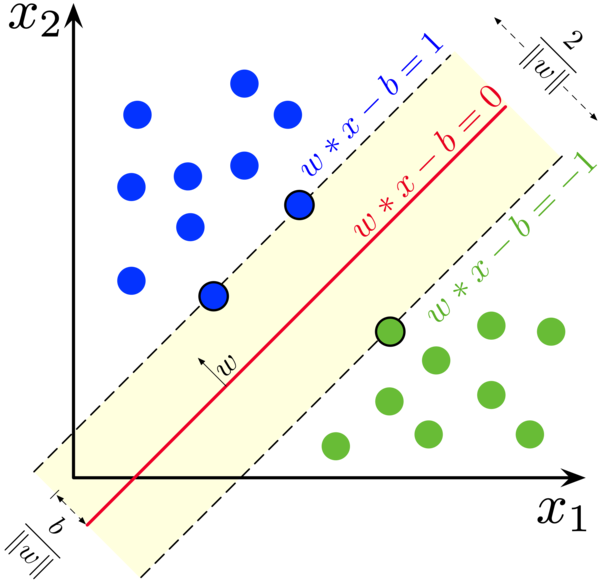

Coding up an linear SVM  in Pytorch is pretty straightforward as we can use the  autograd and optim packages. 


https://github.com/nikhilraghava/PyTorch-SVM/blob/master/SVM%20-%20PyTorch.ipynb


This is pretty straighforward, and has been done before by <a href="http://deeplearning.net/wp-content/uploads/2013/03/dlsvm.pdf">Tang in this 2013 paper</a>.</p>
<p>The separating hyperplane is defined by the <strong>wx - b = 0</strong> equation, where <strong>w</strong> is the normal vector and <strong>b</strong> is a scalar offset. <strong>w</strong>’s dimendionality is however many features we have. Additionally, we will try to place the plane in such a way that it falls halfway between the two classes, so that, if possible, there are no points behind the <strong>wx - b = ±1</strong> lines (see first image). For each training point <strong>x</strong>, we want <strong>wx - b &gt; 1</strong> if <strong>x</strong> is in the <strong>+1</strong> class, <strong>wx - b &lt; -1</strong> if <strong>x</strong> is in the <strong>-1</strong> class (we re-label classes to <strong>±1</strong>). Calling the labels <strong>y</strong>, we can multiply both equations to get the same thing: <strong>y ( wx - b) &gt; 1</strong>, or <strong>1 - y ( wx - b ) &lt; 0</strong>.</p>
<p>So our constraint is for these expressions to be less than zero for each training point. If it’s positive, that’s “bad”. If it’s negative, we don’t really care how negative it is. This leads to the loss function: <strong>∑ max[0, 1 - y ( wx - b ) ]</strong>. To make it optimizer friendly, we square it: <strong>∑ max[0, 1 - y ( wx - b ) ]²</strong>.</p>
<p>There is a caveat though. What if the training points overlap? Or, there is just a few points which would cause the separating hyperplane’s margin to be very narrow? As the first picture shows, the width of the margin is <strong>2/|w|</strong>, we also want to maximize this, or, minimize <strong>|w|/2</strong>, so the model generalizes better. So the full loss function is: <strong>|w|/2 + C ∑ max[0, 1 - y ( wx - b ) ]²</strong>. <strong>C</strong> is an important hyperparameter, it sets the importance of separating all the points and pushing them outside the margin <em>versus</em> getting a wide margin.</p>
<h2>Pytorch code</h2>
<p>First, let’s get the Iris data. The easiest is to get it from SciKit-Learn, which comes with a bunch of standard datasets. We can use <a href="https://matplotlib.org/api/pyplot_api.html">pyplot</a> to visualize Iris’s 4 features and the 3 species:</p>


In [ ]:
#install pytorch
!conda install -y pytorch torchvision -c pytorch

---
## PyTorch Loss for CXE: expected inputs explained

- `torch.nn.functional.binary_cross_entropy` takes logistic sigmoid values as inputs
- `torch.nn.functional.binary_cross_entropy_with_logits` takes logits as inputs 
- `torch.nn.functional.cross_entropy` takes logits as inputs (performs `log_softmax` internally)
- `torch.nn.functional.nll_loss` is like `cross_entropy` but takes log-probabilities (log-softmax) values as inputs

### L1Loss 
L1Loss is  a loss criterion that measures the mean absolute error (MAE) between each element in the prediction for y  and the target y .For implementation details L1Loss in PyTorch please see [here](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html)

### Set up Iris Dataset and DataLoader

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
# Changing the following to sklearn.datasets from datasets.samples_generator
from sklearn.datasets import make_blobs

import torch
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# load data
iris = load_iris()

X = iris['data'][:,:2]
y = iris['target']
y[y==0] = -1  #make it a binary problem
y[y==2] = 1   #make it a binary problem
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

"""#Blobs data
X, Y = make_blobs(n_samples=500, centers=2, random_state=0, cluster_std=0.4)
Y[np.where(Y == 0)] = -1
in_features = X.shape[1]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
"""
# convert numpy arrays to tensors
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.FloatTensor(y_train)
y_test_tensor = torch.FloatTensor(y_test)

# create TensorDataset
X_train_ds = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
X_test_ds = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)

# create dataloader
batch_size = 16
train_loader = torch.utils.data.DataLoader(X_train_ds, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(X_test_ds, batch_size=batch_size, shuffle=False, num_workers=2)

pd.DataFrame(np.c_[X_test, y_test], columns=iris.feature_names[:2]+["Class"]).plot.scatter(x='sepal length (cm)',  
                                                                                           y='sepal width (cm)', 
                                                                                           title ="Iris TEST  Data",
                                                                                           #color=y_test, 
                                                                                           c=y_test, cmap="brg",colorbar=False,
                                                                                           marker="o" , linestyle='None')
plt.grid()           

### create a SVM Net, a single-layered fully connected neural network

```python
#########################################################
# Soft SVM loss function is 
#
#       Minimize 1/2 𝑊^𝑇𝑊+ 𝜆∑ (i in 0:n) [𝑀𝑎𝑥(0, 1−𝑋_𝑖^𝑇𝑊𝑦_𝑖 )] 
#
## Apply L2 regularization using the weight_decay param of optim.SGD or optim.ADAM
#   1:     weight_decay (float, optional) – weight decay (L2 penalty) (default: 0)
#   2:     or just code it up by oneself as follows:

#########################################################
## Apply L2 regularization CASE 1 of 2 (weight decay) manually
# loss = F.binary_cross_entropy(out, y_train_tensor, reduction='sum')
# loss = loss + 0.5 * LAMBDA * torch.mm(model.out_layer.weight,
#                                      model.out_layer.weight.t())

# note that PyTorch also regularizes the bias, hence, if we want
# to reproduce the behavior of SGD's "weight_decay" param, we have to add
# the bias term as well: 
# loss = loss + 0.5 * LAMBDA * model.out_layer.bias**2

#-------------------------------------------------------
## Apply L2 regularization CASE 2 of 2 (weight decay) via optim package functions
LAMBDA = 2
weight_decay=LAMBDA
optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=LAMBDA)  # SGD optimizer

# Sets the module in training mode.
# This has any effect only on certain modules. See documentations of particular modules for details of 
# their behaviors in training/evaluation mode, if they are affected, e.g. Dropout, BatchNorm, etc.
model.train()  # The SVM model is a subclass of the nn.Module, so it inherits the train method (not necessary here for svms)
# for more info on torch.clamp see https://pytorch.org/docs/stable/generated/torch.clamp.html 
loss = 0.5 torch.mean(torch.clamp(1 - output * y, min=0))  # hinge loss
loss = loss + 0.5 * LAMBDA * torch.mm(model.out_layer.weight,
                                      model.out_layer.weight.t())

```

In [ ]:
sss= 3
sss

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

class SVM(nn.Module):
    """
    A binary Linear Support Vector Machine
    Support Vector Machine (SVM) is a subclass of the nn.Module class and to initialize the SVM, 
    call the base class' init function. the  forward method applies a linear transformation 
    to the incoming data: y = xw + b via a __call__ method in the parent class.
    """
    def __init__(self, num_inputs, num_outputs):
        super().__init__()                                   # Call the init function of nn.Module
        self.out_layer = nn.Linear(num_inputs, num_outputs)  # Add a prediction Linear layer XW + b
        
    def forward(self, x):
        fwd = self.out_layer(x)  # Forward pass
        return fwd #perpendiculat distances

def binary_linear_SVM_loss(y_hat, y, C = 0.10, model = model):
    """ given a training set with m rows and n columns, learn a linear binary SVM 
        with the corresponding hinge loss and regularizatin terms: 
    
             minimize  C/2 * wTw + lamdba/m x  ∑_i max(0, 1 - y_i (XW + b))
             
    """
    #==================================================#
    #               Your code starts here              #
    #==================================================#
    #########################################################
    data_loss = 
    weights = 
    reg_loss = 
    reg_loss = 
    #-------------------------------------------------------
    #==================================================#
    #               Your code ends here                #
    #               Please don't add code below here   #
    #==================================================#

    return data_loss + C* reg_loss/2.0


class SVM_Loss(nn.modules.Module):    
    def __init__(self):
        super(SVM_Loss,self).__init__()
    def forward(self, outputs, labels): 
        """Data loss term (notice that the regularization is missing)"""
        return torch.sum(torch.clamp(1 - outputs.squeeze().t()*labels, min=0))/batch_size



def train_epoch(epoch, clf, criterion, opt, train_loader):
    clf.train() # set model in training mode (need this because of dropout)
    running_loss = 0.0
    
    # dataset API gives us pythonic batching 
    for batch_id, data in enumerate(train_loader):
        inputs, targets = data[0].to(device), data[1].to(device)        
        # 1:zero the grad, 2:forward pass, 3:calculate loss,  and 4:backprop!
        opt.zero_grad()

        outputs = model(inputs) #prediction over the input data
        #loss = criterion(clf, preds, target)  #mean loss for this batch
        loss = criterion(outputs, targets)  #mean loss for this batch
        loss.backward() #calculate nabla_w
        loss_history.append(loss.item())
        opt.step()  #update W
        
        running_loss += loss.item()
        # print statistics
        if batch_id % 100 == 0:    # print every 100 mini-batches
          print(f"Epoch {epoch}, batch {batch_id}, batch loss: {np.round(loss.item(),6)}")
          running_loss = 0.0
    return clf

#from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit
def evaluate_model(epoch, clf, criterion, opt, data_loader, tag = "Test"):
    clf.eval() # set model in inference mode (need this because of dropout)
    correct = 0
    count = 0
    overall_loss = 0.0
    for i,data in enumerate(data_loader):
        inputs, targets = data[0].to(device), data[1].to(device)                
        outputs = clf(inputs)
        # torch.max() Returns a namedtuple (values, indices) where values is the maximum value of each row of the 
        # input tensor in the given dimension dim. And indices is the index location of each maximum value found (argmax).
        #_, predicted_classes = torch.max(outputs.data, 1)  # get the index of the max perp distance
        predicted_classes = torch.where(outputs.squeeze()>=0, 1, 0)
        target_class = torch.where(targets == -1, 0, 1) #swap -1 labels to 0
        correct += (predicted_classes == target_class).sum().item()
        
        #loss = criterion(clf, outputs, targets)           # compute loss value
        loss = criterion(outputs, targets)  #mean loss for this batch
        loss_this_iter = loss.cpu().detach().numpy() # send loss value to CPU to save to logs
        overall_loss += (loss_this_iter * inputs.size(0))  # compute total loss to save to logs
        count += len(inputs)  #inputs.size(0)

        # compute mean loss
    overall_loss /= float(count)

    accuracy = 100. * correct / count
    acc_history.append(accuracy)
    print(f"{tag} {epoch} set: Average loss: {overall_loss:.6f}, Accuracy: {correct}/{count} ({accuracy:.0f}%)")
    return accuracy

loss_history = []
acc_history = []
# adding in_features from 8.1.1
in_features = X.shape[1]
model = SVM(in_features, 1)  # SVM model
for name, parameter in model.named_parameters(): # or param in model.parameters():
    print(f"SVM: {name}, type:{type(parameter)}, size:{parameter.size()}")
print("_"*50)
print(f"model.out_layer.weight: {model.out_layer.weight}")
print(f"model.out_layer.bias:   {model.out_layer.bias}")
#nn.CrossEntropyLoss() #class

#use loss function (as opposed to the loss class; see below)
#binary_linear_SVM_loss = binary_linear_SVM_loss
opt = optim.SGD(model.parameters(), lr=0.01, momentum=0.5) #L2 Regularization term mixing coefficient is part of the loss function

#loss class
binary_linear_SVM_loss = SVM_Loss()
#binary_linear_SVM_loss = nn.HingeEmbeddingLoss(1, reduction="mean")
opt = optim.SGD(model.parameters(), lr=0.01, momentum=0.5, weight_decay=0.1) #L2 Regularization term mixing coefficient
    

for epoch in range(20):
    #print("Epoch %d" % epoch)
    clf = train_epoch(epoch, model, binary_linear_SVM_loss, opt, train_loader)
    if (epoch%10) ==0:
        evaluate_model(epoch,    model, binary_linear_SVM_loss, opt, test_loader, tag = "Validation")
print("-"*50)
evaluate_model(    epoch,    model, binary_linear_SVM_loss, opt, test_loader, tag="Test")


In [ ]:
def display_SVM_decision_surface(X, Y, model):
    W = model.out_layer.weight.squeeze().detach().cpu().numpy()
    b = model.out_layer.bias.squeeze().detach().cpu().numpy()

    delta = 0.001
    x = np.arange(X[:, 0].min(), X[:, 0].max(), delta)
    y = np.arange(X[:, 1].min(), X[:, 1].max(), delta)
    x, y = np.meshgrid(x, y)
    xy = list(map(np.ravel, [x, y]))

    z = (W.dot(xy) + b).reshape(x.shape)
    z[np.where(z > 1.0)] = 4
    z[np.where((z > 0.0) & (z <= 1.0))] = 3
    z[np.where((z > -1.0) & (z <= 0.0))] = 2
    z[np.where(z <= -1.0)] = 1

    plt.figure(figsize=(10, 10))
    plt.xlim([X[:, 0].min() + delta, X[:, 0].max() - delta])
    plt.ylim([X[:, 1].min() + delta, X[:, 1].max() - delta])
    plt.contourf(x, y, z, alpha=0.8, cmap="Greys")
    plt.scatter(x=X[:, 0], y=X[:, 1], c="black", s=10)
    plt.tight_layout()
    plt.show()
    
display_SVM_decision_surface(X_test, y_test, model)

In [ ]:
import argparse

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
#removing samples.generator from below
from sklearn.datasets import make_blobs


def train(X, Y, model, args):
    X = torch.FloatTensor(X)
    Y = torch.FloatTensor(Y)
    N = len(Y)

    optimizer = optim.SGD(model.parameters(), lr=args["lr"])

    model.train()
    for epoch in range(args["epoch"]):
        perm = torch.randperm(N)
        sum_loss = 0

        for i in range(0, N, args["batchsize"]):
            x = X[perm[i : i + args["batchsize"]]].to(args["device"])
            y = Y[perm[i : i + args["batchsize"]]].to(args["device"])

            optimizer.zero_grad()
            output = model(x).squeeze()
            weight = model.weight.squeeze()

            loss = torch.mean(torch.clamp(1 - y * output, min=0))
            loss += args["c"] * (weight.t() @ weight) / 2.0

            loss.backward()
            optimizer.step()

            sum_loss += float(loss)

        print("Epoch: {:4d}\tloss: {}".format(epoch, sum_loss / N))


def visualize(X, Y, model):
    W = model.weight.squeeze().detach().cpu().numpy()
    b = model.bias.squeeze().detach().cpu().numpy()

    delta = 0.001
    x = np.arange(X[:, 0].min(), X[:, 0].max(), delta)
    y = np.arange(X[:, 1].min(), X[:, 1].max(), delta)
    x, y = np.meshgrid(x, y)
    xy = list(map(np.ravel, [x, y]))

    z = (W.dot(xy) + b).reshape(x.shape)
    z[np.where(z > 1.0)] = 4
    z[np.where((z > 0.0) & (z <= 1.0))] = 3
    z[np.where((z > -1.0) & (z <= 0.0))] = 2
    z[np.where(z <= -1.0)] = 1

    plt.figure(figsize=(10, 10))
    plt.xlim([X[:, 0].min() + delta, X[:, 0].max() - delta])
    plt.ylim([X[:, 1].min() + delta, X[:, 1].max() - delta])
    plt.contourf(x, y, z, alpha=0.8, cmap="Greys")
    plt.scatter(x=X[:, 0], y=X[:, 1], c="black", s=10)
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    args={"device":"cpu", "c": 0.001, "lr": 0.1, "batchsize": 16, "epoch": 50}
    print(args, args.keys())
    print(args["device"])
    X, Y = make_blobs(n_samples=500, centers=2, random_state=0, cluster_std=0.4)
    X = (X - X.mean()) / X.std()
    Y[np.where(Y == 0)] = -1

    model = nn.Linear(2, 1)
    model.to(args["device"])

    train(X, Y, model, args)
    visualize(X, Y, model)

# [Optional Task]Linear SVM for the Binary Classifier and n-ary Classifier

## Implement a linear svm for the binary classifier

In PyTorch, implement a linear SVM  for the binary classifier. Benchmark your implementation against the SKLearn implementation using the Iris dataset. In this experiment, learn a Setosa versus the rest. Split the data into train-test based on 70-30 split. Report the accuracy and wall clock times for both your PyTorch implementation and SKLearn implementation on the training and test sets. 

### Results

Implement experiment table detailing accuracy, execution times for train, test using your PyTorch implementation and SkLearn’s implementation 

## Implement a linear svm for a n-ary classifier

In PyTorch, implement a linear SVM  for the n-ary classifier. Benchmark your implementation against the SKLearn implementation using the Iris dataset. In this experiment, learn a three class classifier. Split the data into train-test based on 70-30 split. Report the accuracy and wall clock times for both your PyTorch implementation and SKLearn implementation on the training and test sets.

### Results

Implement experiment table detailing accuracy, execution times for train, test using your PyTorch implementation and SkLearn’s implementation